f:\an-001-masters1newtrail\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\an-001-masters1newtrail\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


                   Model  Training Accuracy  Testing Accuracy
1          Random Forest           0.998507          0.845238
5          Decision Tree           0.998507          0.809524
6     Bagging Classifier           0.965672          0.797619
0    Logistic Regression           0.722388          0.702381
3  Bernoulli Naive Bayes           0.700000          0.696429
4                    KNN           0.826866          0.696429
2   Gaussian Naive Bayes           0.585075          0.589286


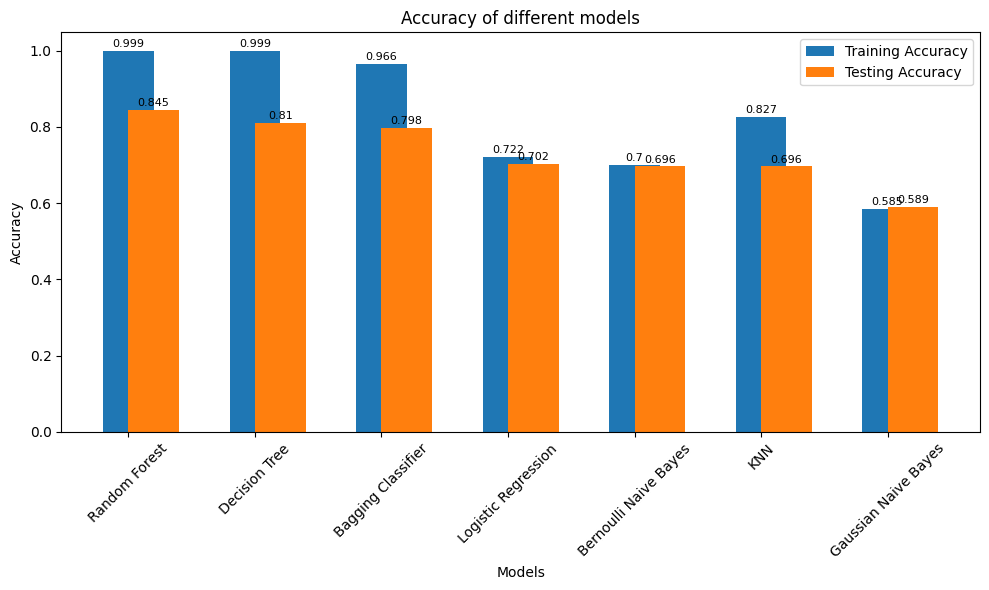

The best model is: Random Forest


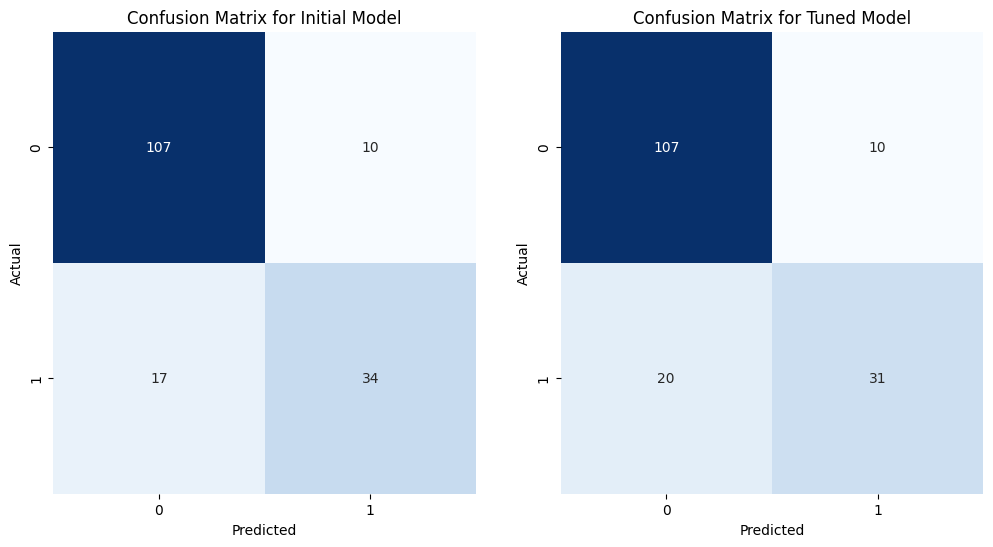

The initial model performs better than the tuned model.


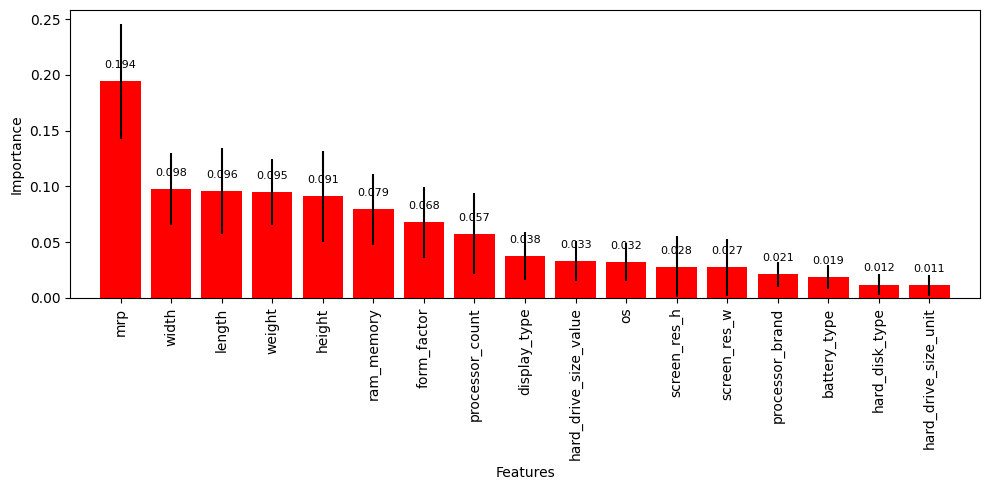

Final Model Selected: RandomForestClassifier()


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns

# Loading the data
df = pd.read_csv("./data/processed.csv")

# Defining the target variable and feature set
y = df["is_success"]
X = df.drop(columns=["is_success", "product_id"], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of models
models_list = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Bernoulli Naive Bayes", BernoulliNB()),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier())),
]

# Create a DataFrame to store model performance metrics
result = pd.DataFrame(columns=["Model", "Training Accuracy", "Testing Accuracy"])

# Iterate over each model, fit it, and calculate accuracy scores
for name, model in models_list:
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_score = accuracy_score(y_train, train_predictions)

    test_predictions = model.predict(X_test)
    test_score = accuracy_score(y_test, test_predictions)

    new_row = {
        "Model": name,
        "Training Accuracy": train_score,
        "Testing Accuracy": test_score,
    }
    result.loc[len(result)] = new_row

# Sort the results by testing accuracy in descending order
result = result.sort_values(by=["Testing Accuracy"], ascending=False)

# Print the result DataFrame
print(result)
import matplotlib.pyplot as plt

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
bar1 = plt.bar(result["Model"], result["Training Accuracy"], label="Training Accuracy", width=0.4, align='center')
bar2 = plt.bar(result["Model"], result["Testing Accuracy"], label="Testing Accuracy", width=0.4, align='edge')

# Adding the values on top of the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=8)

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=8)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns

# Select the best model
best_model_name = result.iloc[0]["Model"]
best_model = [model for name, model in models_list if name == best_model_name][0]

# Print the best model
print(f"The best model is: {best_model_name}")

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Perform cross-validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Reduce the range of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(best_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
grid_search.best_params_

# Compute metrics for the best model
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Visualizing confusion matrix for both initial and tuned models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Initial Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Condition to check if the tuned model performs better than the initial model
if accuracy_best > accuracy:
    print("The tuned model performs better than the initial model.")
    final_model = best_rf
    importances = best_rf.feature_importances_
else:
    print("The initial model performs better than the tuned model.")
    final_model = best_model
    importances = best_model.feature_importances_  # Adjust as needed

std = np.std([tree.feature_importances_ for tree in final_model.estimators_], axis=0)  # Adjust as needed
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
feature_names = [X.columns[i] for i in indices]
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')

# Adding the values on top of the bars
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("Final Model Selected:", final_model)


f:\an-001-masters1newtrail\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\an-001-masters1newtrail\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


                   Model  Training Accuracy  Testing Accuracy
1          Random Forest           0.998507          0.833333
6     Bagging Classifier           0.962687          0.827381
5          Decision Tree           0.998507          0.815476
0    Logistic Regression           0.722388          0.702381
3  Bernoulli Naive Bayes           0.700000          0.696429
4                    KNN           0.826866          0.696429
2   Gaussian Naive Bayes           0.585075          0.589286


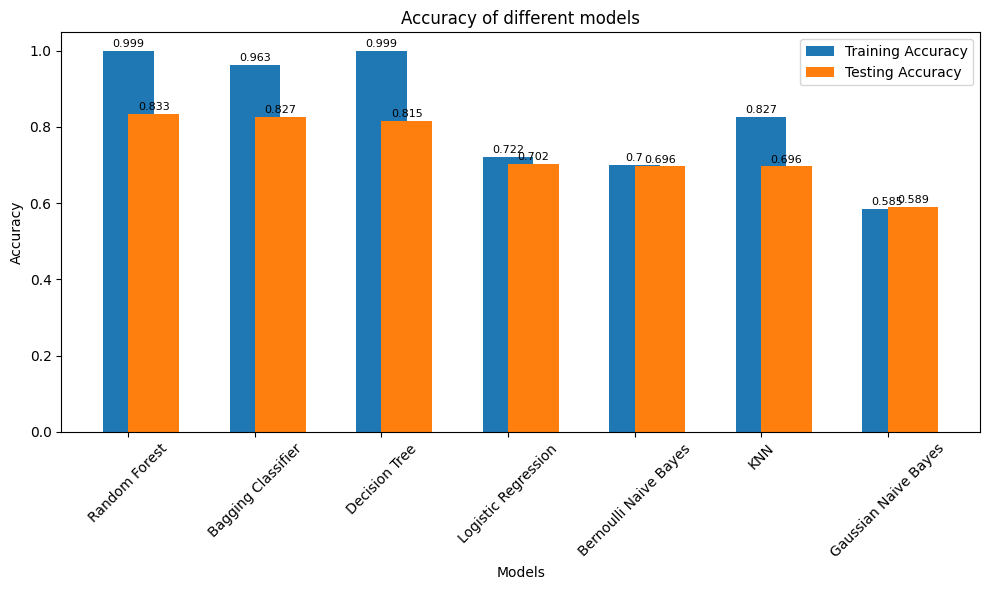

The best model is: Random Forest


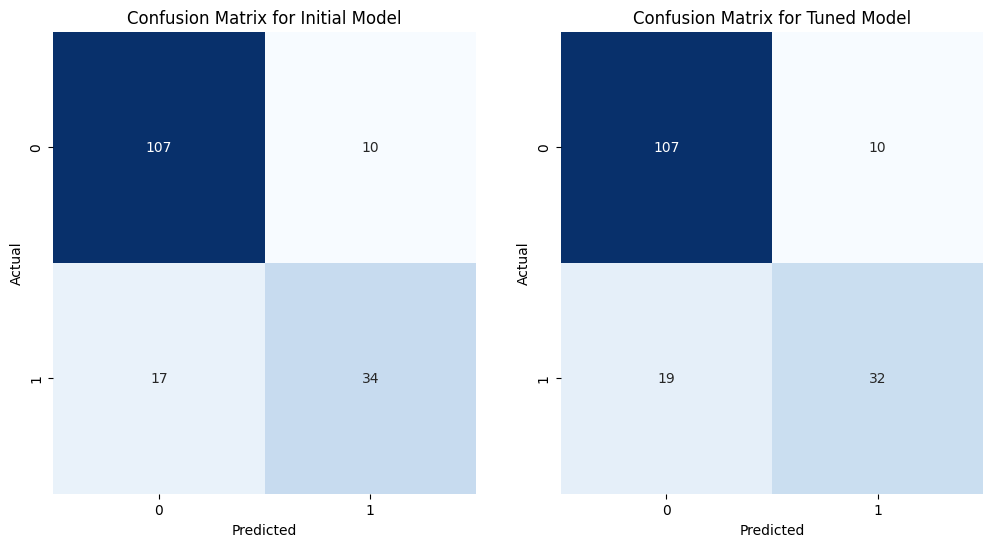

The initial model performs better than the tuned model.


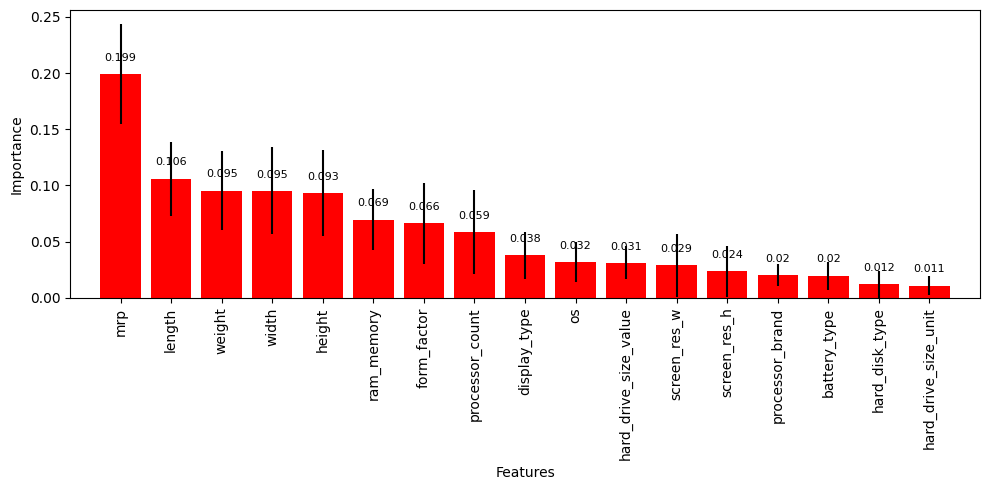

Final Model Selected: RandomForestClassifier()


In [10]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns

# Loading the data
df = pd.read_csv("./data/processed.csv")

# Defining the target variable and feature set
y = df["is_success"]
X = df.drop(columns=["is_success", "product_id"], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models
models_list = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Bernoulli Naive Bayes", BernoulliNB()),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier())),
]

# Create a DataFrame to store model performance metrics
result = pd.DataFrame(columns=["Model", "Training Accuracy", "Testing Accuracy"])

# Iterate over each model, fit it, and calculate accuracy scores
for name, model in models_list:
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_score = accuracy_score(y_train, train_predictions)

    test_predictions = model.predict(X_test)
    test_score = accuracy_score(y_test, test_predictions)

    new_row = {
        "Model": name,
        "Training Accuracy": train_score,
        "Testing Accuracy": test_score,
    }
    result.loc[len(result)] = new_row

# Sort the results by testing accuracy in descending order
result = result.sort_values(by=["Testing Accuracy"], ascending=False)

# Print the result DataFrame
print(result)

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
bar1 = plt.bar(result["Model"], result["Training Accuracy"], label="Training Accuracy", width=0.4, align='center')
bar2 = plt.bar(result["Model"], result["Testing Accuracy"], label="Testing Accuracy", width=0.4, align='edge')

# Adding the values on top of the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=8)

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=8)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Select the best model
best_model_name = result.iloc[0]["Model"]
best_model = [model for name, model in models_list if name == best_model_name][0]

# Print the best model
print(f"The best model is: {best_model_name}")

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Round the accuracy values
accuracy = round(accuracy, 3)

# Perform cross-validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Reduce the range of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(best_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Compute metrics for the best model
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Round the accuracy values for the best model
accuracy_best = round(accuracy_best, 3)

# Visualizing confusion matrix for both initial and tuned models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Initial Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Condition to check if the tuned model performs better than the initial model
if accuracy_best > accuracy:
    print("The tuned model performs better than the initial model.")
    final_model = best_rf
    importances = best_rf.feature_importances_
else:
    print("The initial model performs better than the tuned model.")
    final_model = best_model
    importances = best_model.feature_importances_

std = np.std([tree.feature_importances_ for tree in final_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
feature_names = [X.columns[i] for i in indices]
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')

# Adding the values on top of the bars
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("Final Model Selected:", final_model)


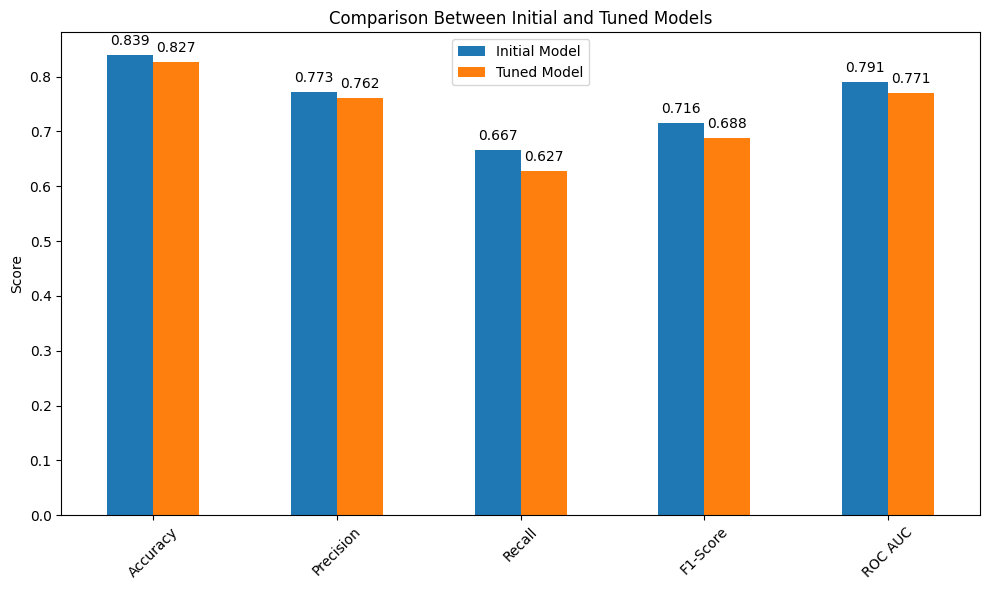

In [11]:
# Storing the metrics for the initial and tuned models
metrics_comparison = {
    'Initial Model': [accuracy, precision, recall, f1, roc_auc],
    'Tuned Model': [accuracy_best, precision_best, recall_best, f1_best, roc_auc_best]
}

# Creating a DataFrame for visualization
metrics_df = pd.DataFrame(metrics_comparison, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"])

# Plotting the bar chart
ax = metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison Between Initial and Tuned Models")
plt.ylabel("Score")
plt.xticks(rotation=45)

# Adding the values on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [14]:
metrics_df


,Initial Model,Tuned Model
Accuracy,0.839000,0.827000
Precision,0.772727,0.761905
Recall,0.666667,0.627451
F1-Score,0.715789,0.688172
ROC AUC,0.790598,0.770990


In [19]:
feature_importances = pd.Series(importances, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Feature Importances:
mrp                      0.199085
length                   0.105995
weight                   0.095362
width                    0.095284
height                   0.093171
ram_memory               0.069493
form_factor              0.066374
processor_count          0.058636
display_type             0.037972
os                       0.031905
hard_drive_size_value    0.031173
screen_res_w             0.028928
screen_res_h             0.023698
processor_brand          0.020026
battery_type             0.019767
hard_disk_type           0.012172
hard_drive_size_unit     0.010959
dtype: float64


In [23]:
print("Confusion Matrix for Initial Model:")
print(confusion_matrix(y_test, y_pred))
print("Confusion Matrix for Tuned Model:")
print(confusion_matrix(y_test, y_pred_best))

Confusion Matrix for Initial Model:
[[107  10]
 [ 17  34]]
Confusion Matrix for Tuned Model:
[[107  10]
 [ 19  32]]
